In [1]:
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Preprocessed Data

In [2]:
df = pd.read_csv(r"C:\Users\bhaga\Downloads\Amazon Sale Report.csv", encoding='latin1')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preprocessing
# Load the dataset
df = pd.read_csv(r"C:\Users\bhaga\Downloads\Amazon Sale Report.csv", encoding='latin1')

# Attempt to convert 'Date' column to datetime without specifying the format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for any parsing errors
parsing_errors = df[df['Date'].isna()]
print(f"Parsing errors:\n{parsing_errors[['Order ID', 'Date']]}")


Parsing errors:
Empty DataFrame
Columns: [Order ID, Date]
Index: []


# 1. Sales Overview:

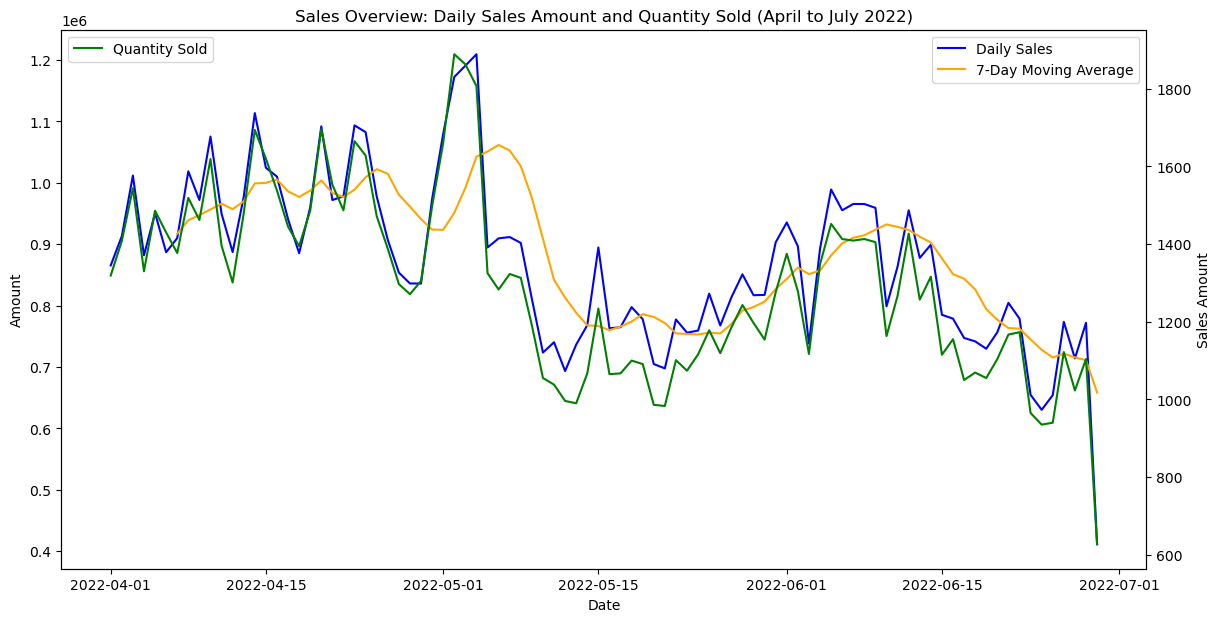

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\bhaga\Downloads\Amazon Sale Report.csv", encoding='latin1')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing 'Amount' values and valid dates
df = df.dropna(subset=['Amount', 'Date'])

# Filter the data for April to July 2022
df_apr_jul_2022 = df[(df['Date'].dt.year == 2022) & (df['Date'].dt.month >= 4) & (df['Date'].dt.month <= 7)]

# Aggregate sales data by date
daily_sales_apr_jul_2022 = df_apr_jul_2022.groupby('Date').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()

# Calculate moving average for smoothing
daily_sales_apr_jul_2022['7_day_MA'] = daily_sales_apr_jul_2022['Amount'].rolling(window=7).mean()

# Step 2: Sales Overview Visualization for April to July 2022
plt.figure(figsize=(14, 7))

# Plot the sales trend over time
sns.lineplot(x='Date', y='Amount', data=daily_sales_apr_jul_2022, label='Daily Sales', color='blue')

# Plot the moving average
sns.lineplot(x='Date', y='7_day_MA', data=daily_sales_apr_jul_2022, label='7-Day Moving Average', color='orange')

# Plot quantity sold on a secondary y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Qty', data=daily_sales_apr_jul_2022, label='Quantity Sold', color='green', ax=ax2)
ax2.set_ylabel('Quantity Sold')

# Customize the plot
plt.title('Sales Overview: Daily Sales Amount and Quantity Sold (April to July 2022)')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend(loc='upper left')

plt.show()


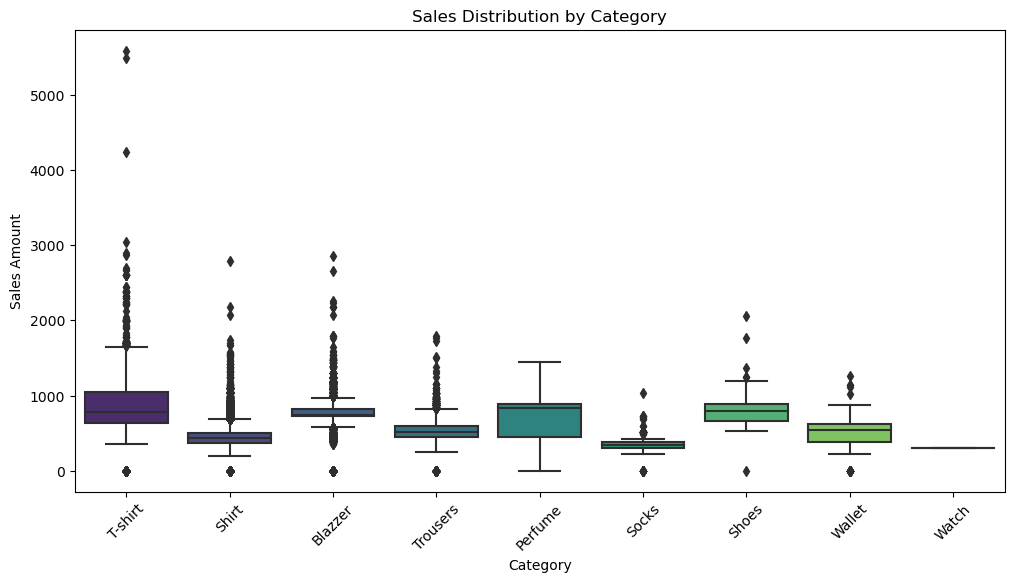

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Amount', data=df, palette='viridis')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()


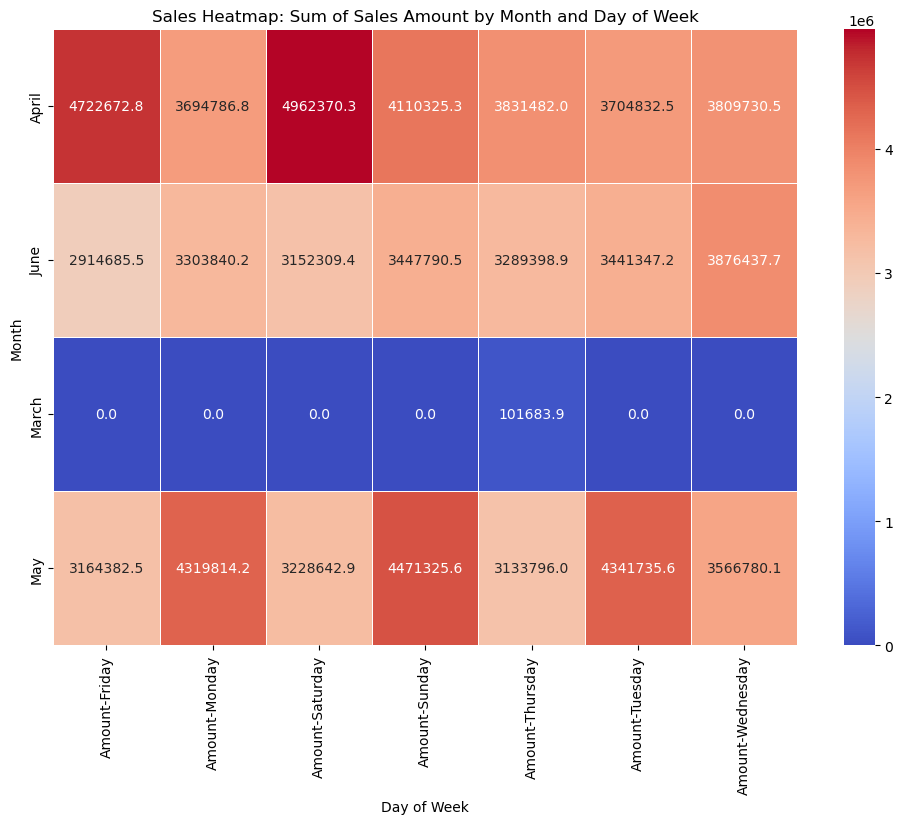

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date' is already converted to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create 'Month' column from 'Date'
df['Month'] = df['Date'].dt.month_name()

# Create 'DayOfWeek' column from 'Date'
df['DayOfWeek'] = df['Date'].dt.day_name()

# Group the data by 'Month' and 'DayOfWeek' and aggregate the 'Amount'
heatmap_data = df.groupby(['Month', 'DayOfWeek']).agg({'Amount': 'sum'}).unstack().fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)
plt.title('Sales Heatmap: Sum of Sales Amount by Month and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()



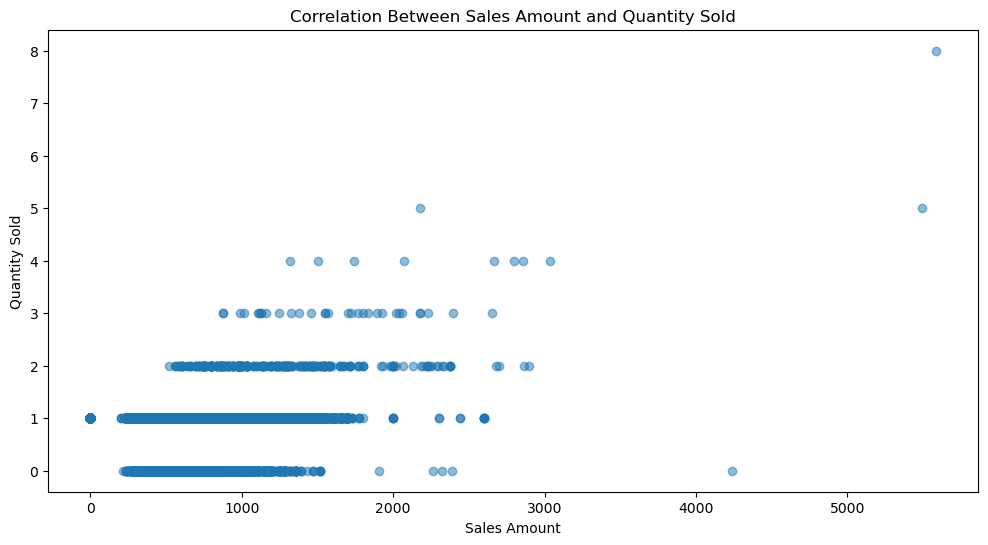

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Amount'], df['Qty'], alpha=0.5)
plt.title('Correlation Between Sales Amount and Quantity Sold')
plt.xlabel('Sales Amount')
plt.ylabel('Quantity Sold')
plt.show()


# Data Analysis and Visualizations

## 1. Sales Overview: Daily Sales Amount and Quantity Sold (April to July 2022)

### Visualization
The line plot shows:
- **Daily Sales Amount**: Represented by a blue line.
- **7-Day Moving Average**: Shown in orange for smoothing trends.
- **Quantity Sold**: Displayed on a secondary y-axis in green.

### Conclusion
The moving average smooths out short-term fluctuations, revealing the underlying trend in sales amounts. The secondary y-axis helps compare sales amount with the quantity sold, providing a comprehensive view of sales performance.

## 2. Sales Distribution by Category

### Visualization
The box plot illustrates:
- **Sales Distribution**: Across different categories, with sales amount on the y-axis.

### Conclusion
The box plot highlights the spread and central tendency of sales across categories. It identifies categories with high variability and those with consistently high or low sales amounts.

## 3. Sales Heatmap: Sum of Sales Amount by Month and Day of Week

### Visualization
The heatmap displays:
- **Sales Amount**: Aggregated by month and day of the week.
- **Color Gradient**: Shows sales intensity, with warmer colors indicating higher sales.

### Conclusion
The heatmap reveals patterns in sales across different months and days of the week. It helps identify peak sales periods and days with lower sales activity.

## 4. Correlation Between Sales Amount and Quantity Sold

### Visualization
The scatter plot shows:
- **Sales Amount**: On the x-axis.
- **Quantity Sold**: On the y-axis.
- **Data Points**: Represent individual transactions.

### Conclusion
The scatter plot helps assess the relationship between sales amount and quantity sold. A positive correlation suggests that higher sales amounts are associated with larger quantities sold. Outliers can indicate special cases or anomalies.



# 2.Product Analysis:

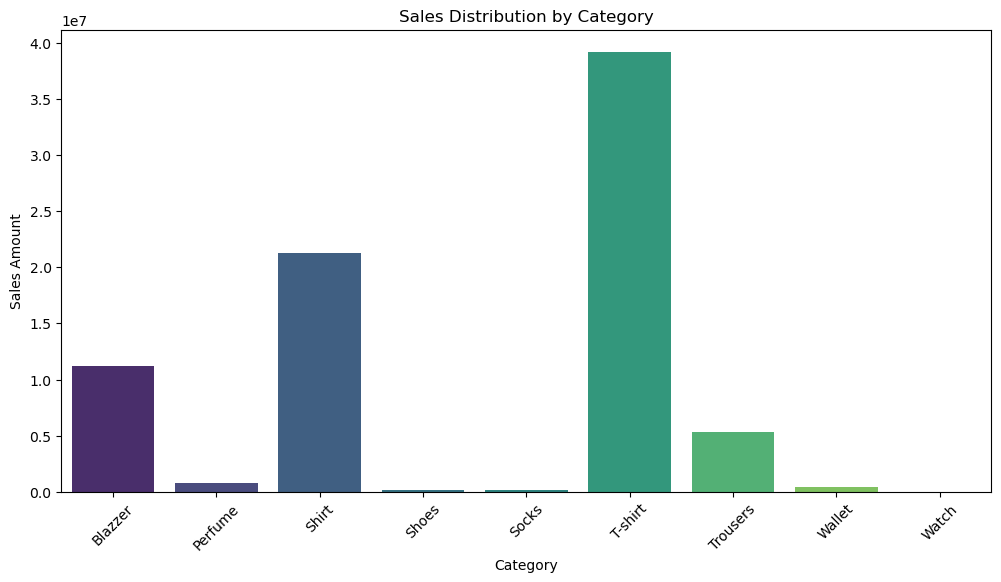

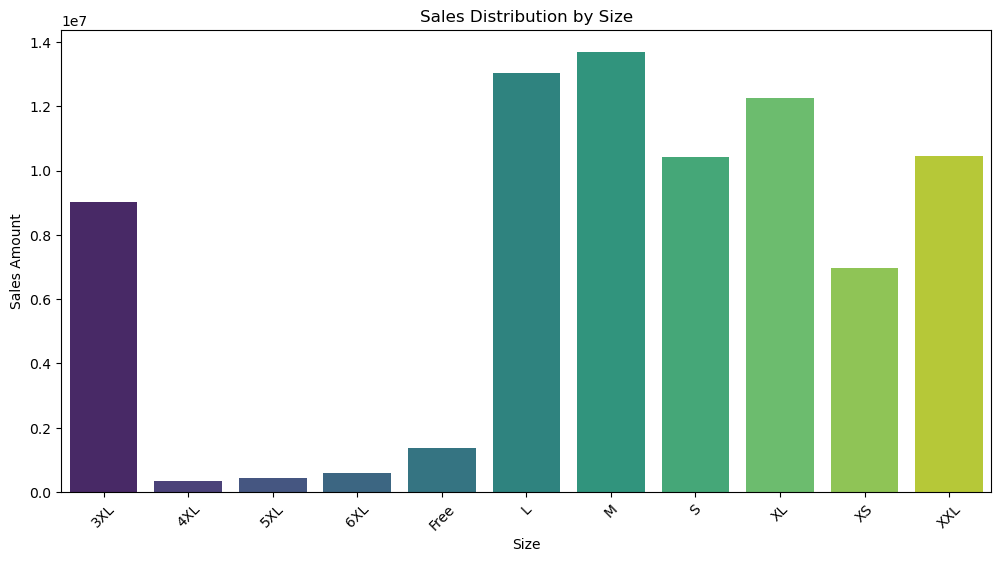

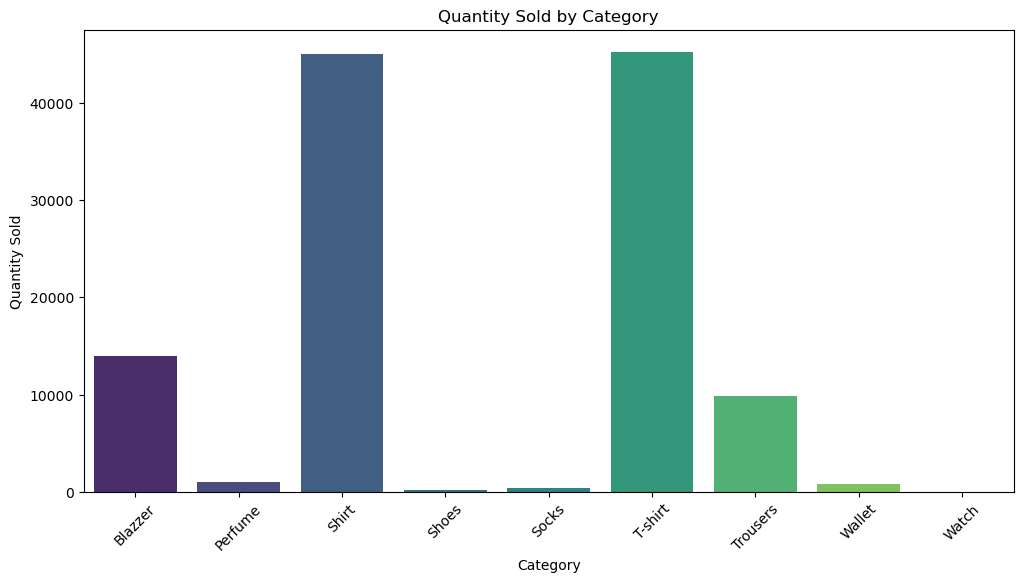

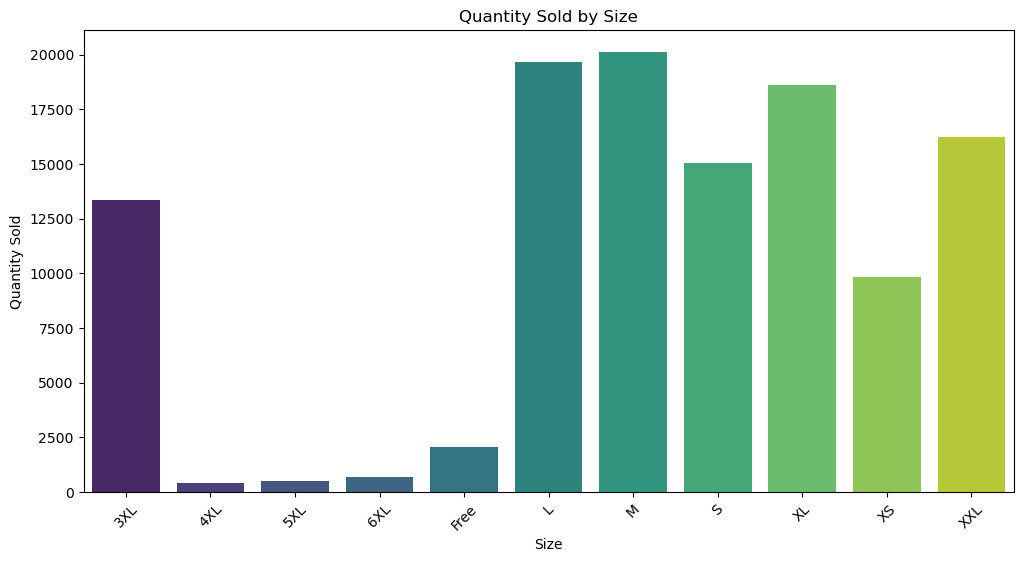

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\bhaga\Downloads\Amazon Sale Report.csv", encoding='latin1')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing 'Amount' values and valid dates
df = df.dropna(subset=['Amount', 'Date'])

# Task 2: Product Analysis

# Aggregating sales data by product category
category_sales = df.groupby('Category').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()

# Aggregating sales data by product size
size_sales = df.groupby('Size').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()

# Visualization 1: Sales Distribution by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Amount', data=category_sales, palette='viridis')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Sales Distribution by Size
plt.figure(figsize=(12, 6))
sns.barplot(x='Size', y='Amount', data=size_sales, palette='viridis')
plt.title('Sales Distribution by Size')
plt.xlabel('Size')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Quantity Sold by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Qty', data=category_sales, palette='viridis')
plt.title('Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Visualization 4: Quantity Sold by Size
plt.figure(figsize=(12, 6))
sns.barplot(x='Size', y='Qty', data=size_sales, palette='viridis')
plt.title('Quantity Sold by Size')
plt.xlabel('Size')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


## Product Analysis: Distribution of Product Categories, Sizes, and Quantities Sold

### Purpose

The goal of this analysis is to understand the distribution and popularity of different product categories and sizes based on sales amount and quantity sold. By examining these aspects, we can gain insights into which products are performing best and make informed decisions about inventory, marketing, and sales strategies.

### Visualizations

1. **Sales Distribution by Category**
   - **Purpose:** To identify which product categories generate the highest total sales amount. This helps in understanding which categories contribute most to overall revenue.
   - **Insight:** Categories with higher sales amounts indicate stronger performance and can be prioritized for promotional activities or inventory restocking.

2. **Sales Distribution by Size**
   - **Purpose:** To determine which product sizes are contributing the most to total sales. This helps in recognizing trends in customer preferences regarding sizes.
   - **Insight:** Sizes that generate higher sales amounts can be emphasized in marketing and inventory planning.

3. **Quantity Sold by Category**
   - **Purpose:** To assess the total quantity sold for each product category. This provides insight into the volume of sales and helps identify popular categories based on the number of units sold.
   - **Insight:** High quantities sold in certain categories suggest strong market demand and can inform decisions on stock levels and sales strategies.

4. **Quantity Sold by Size**
   - **Purpose:** To evaluate the quantity of products sold for each size. This helps in understanding customer preferences for different sizes.
   - **Insight:** Popular sizes based on sales volume should be highlighted in marketing efforts and considered in inventory management.

### Conclusion

The analysis of sales distribution by category and size provides valuable insights into product performance. By understanding which categories and sizes are driving the most revenue and sales volume, businesses can make strategic decisions to optimize inventory, tailor marketing campaigns, and enhance overall sales performance. Identifying popular products helps in aligning business strategies with customer preferences and market trends.


# 3. Fulfillment Analysis:

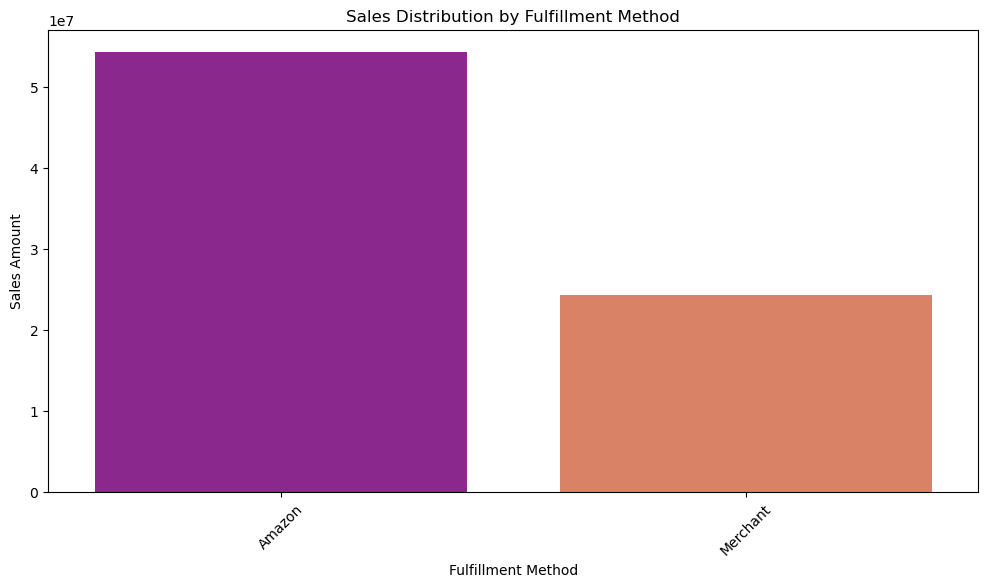

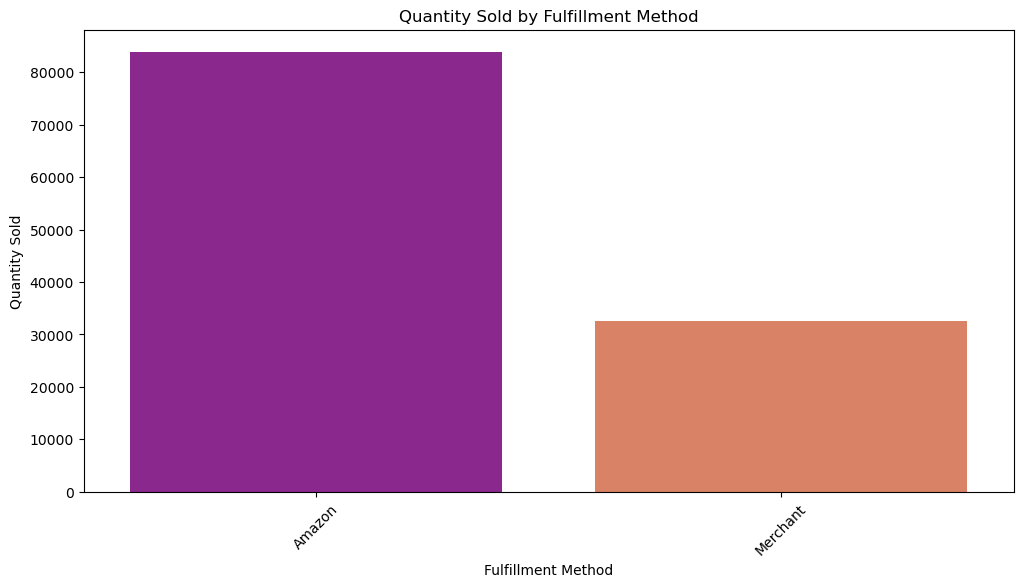

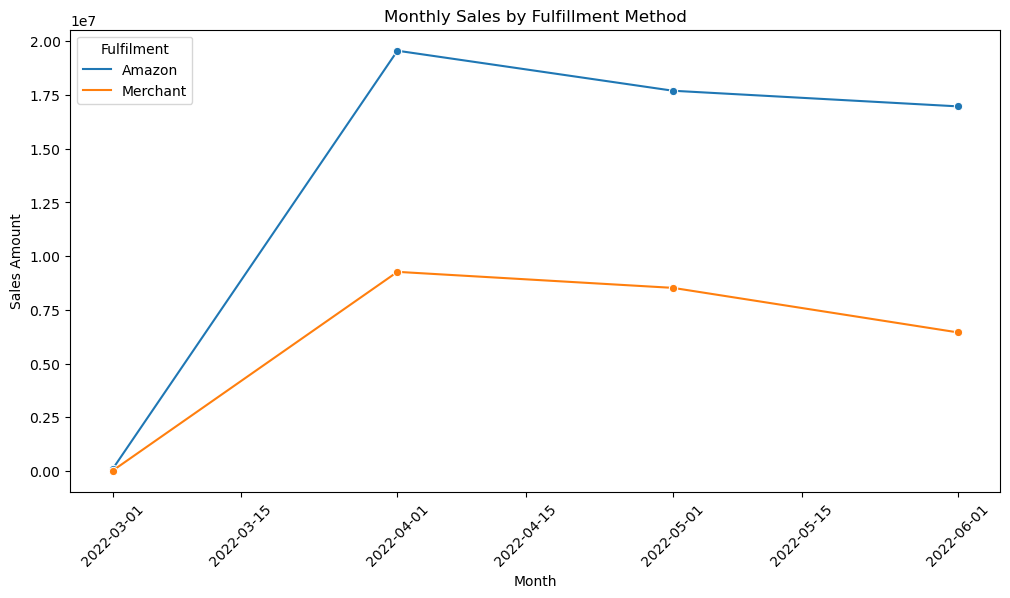

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\bhaga\Downloads\Amazon Sale Report.csv", encoding='latin1')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert 'Amount' to numeric, coercing errors
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Drop rows with missing 'Amount' or 'Date' values
df = df.dropna(subset=['Amount', 'Date'])

# Task 3: Fulfillment Analysis

# Aggregating sales data by fulfillment method
fulfillment_sales = df.groupby('Fulfilment').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()

# Aggregating sales data by fulfillment method and month
monthly_fulfillment_sales = df.groupby(['Fulfilment', df['Date'].dt.to_period('M')]).agg({'Amount': 'sum'}).reset_index()

# Convert 'Date' to datetime for plotting (as period)
monthly_fulfillment_sales['Date'] = monthly_fulfillment_sales['Date'].dt.to_timestamp()

# Visualization 1: Sales Distribution by Fulfillment Method
plt.figure(figsize=(12, 6))
sns.barplot(x='Fulfilment', y='Amount', data=fulfillment_sales, palette='plasma')
plt.title('Sales Distribution by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Quantity Sold by Fulfillment Method
plt.figure(figsize=(12, 6))
sns.barplot(x='Fulfilment', y='Qty', data=fulfillment_sales, palette='plasma')
plt.title('Quantity Sold by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Monthly Sales by Fulfillment Method
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Amount', hue='Fulfilment', data=monthly_fulfillment_sales, marker='o')
plt.title('Monthly Sales by Fulfillment Method')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()


## Fulfillment Analysis: Sales Distribution and Quantity Sold by Fulfillment Method

### What the Code Shows:

The code performs an analysis of sales distribution and the quantity of products sold across different fulfillment methods. The dataset is first cleaned by converting the `Date` and `Amount` columns to the appropriate data types and removing rows with missing values. The sales data is then aggregated by fulfillment method, calculating the total sales (`Amount`) and total quantity sold (`Qty`) for each method.

Two pie charts are generated to visualize:
1. **Sales Distribution by Fulfillment Method**: This chart shows the proportion of total sales attributed to each fulfillment method.
2. **Quantity Sold by Fulfillment Method**: This chart displays the percentage of the total quantity of products sold through each fulfillment method.

### Conclusions:

- **Sales Distribution**: The pie chart reveals which fulfillment method contributes the most to overall sales. This can help identify the most effective fulfillment strategies in terms of revenue generation.

- **Quantity Sold**: The second pie chart indicates how many items are sold through each fulfillment method. A method with a high percentage here might be more efficient in handling volume, even if it doesn’t generate the most revenue.

- **Comparison Between Sales and Quantity**: By comparing the two charts, one can determine if a particular fulfillment method is effective in both generating revenue and handling large volumes of orders. For instance, a fulfillment method with a high percentage in both charts might be well-rounded, while discrepancies between the charts might suggest differences in the value per item sold through each method.

These insights can inform decisions on optimizing fulfillment strategies to improve overall efficiency and profitability.


In [10]:
# Display the column names
print(df.columns)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


# 4. Customer Segmentation:

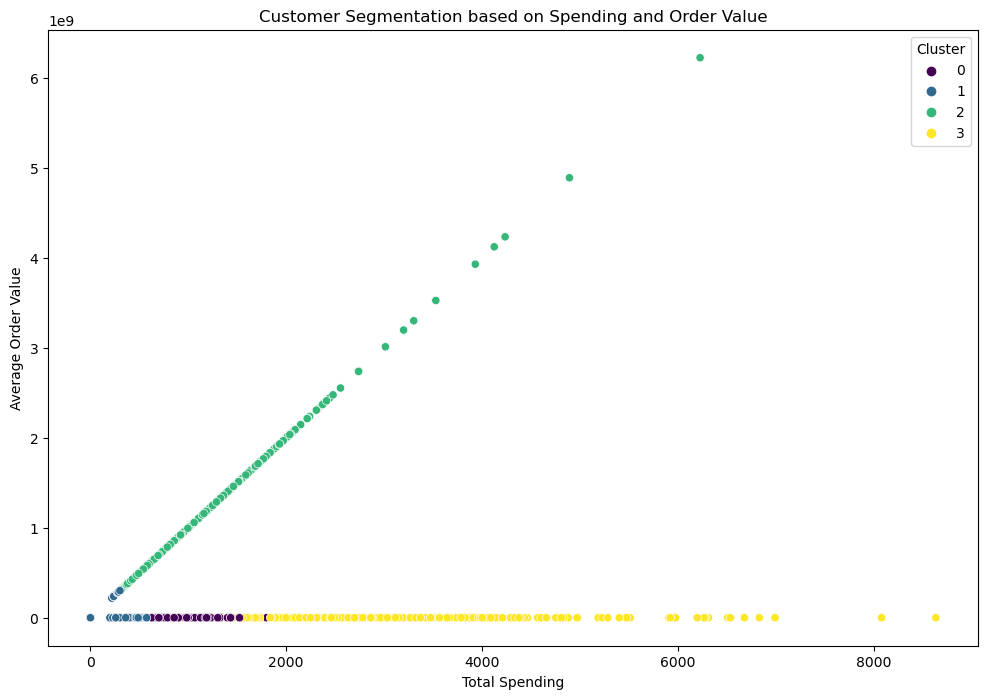

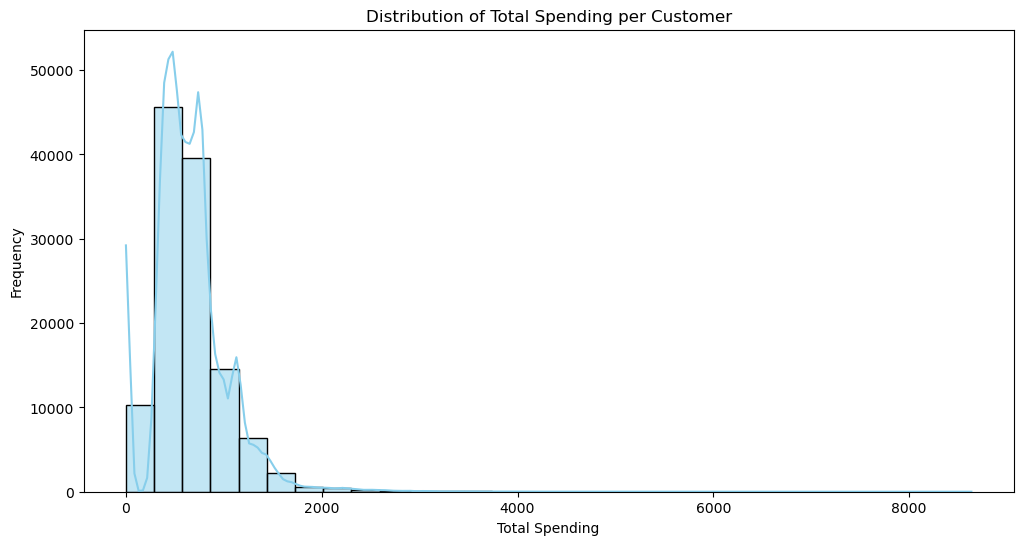

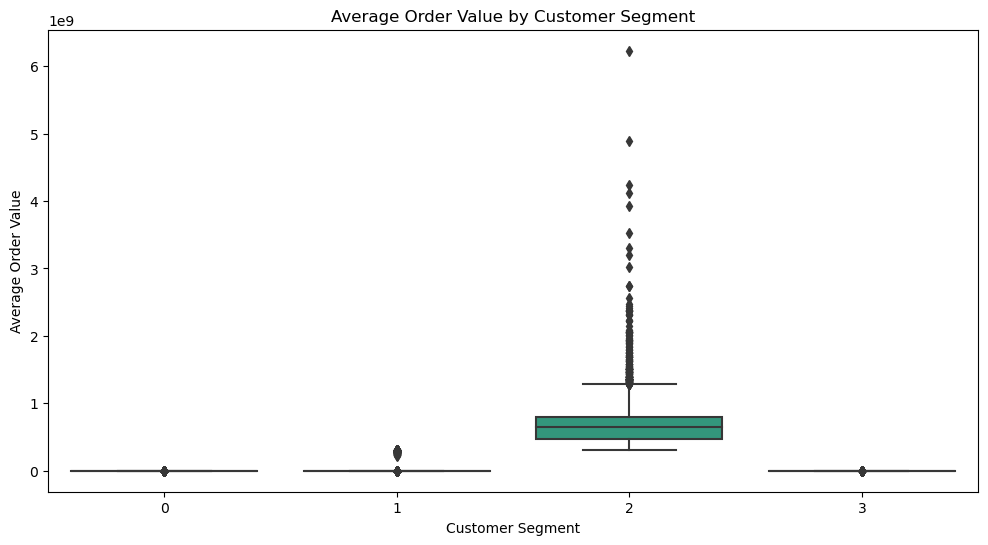

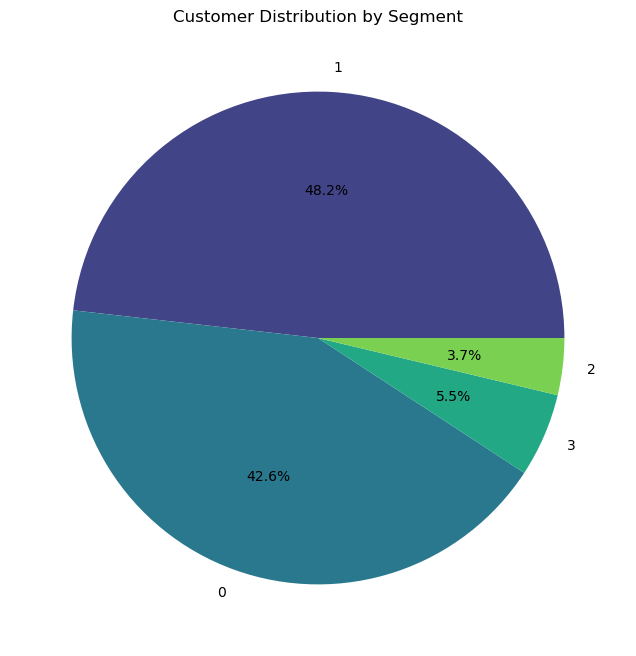

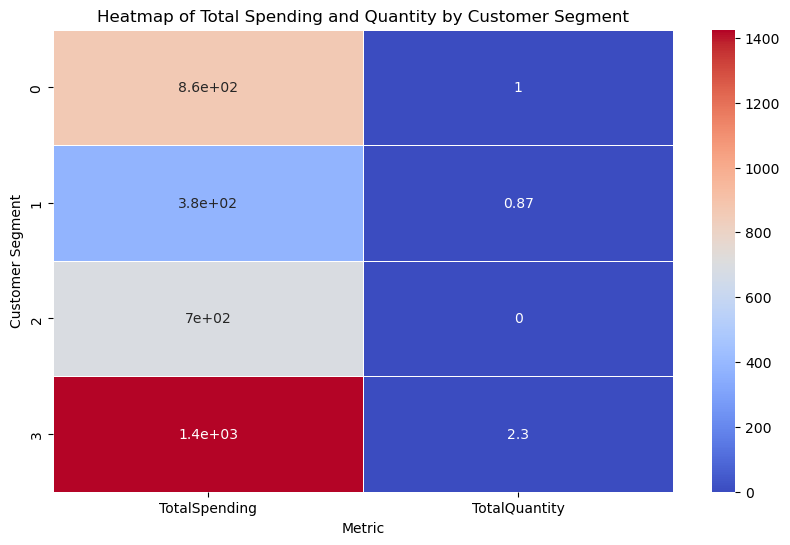

              Order ID  TotalSpending  TotalQuantity         ship-city  \
0  171-0000547-8192359          301.0              1  PIMPRI CHINCHWAD   
1  171-0000902-4490745          544.0              1            Howrah   
2  171-0001409-6228339          422.0              1             KODAD   
3  171-0003082-5110755          563.0              1     GREATER NOIDA   
4  171-0003738-2052324          379.0              1         FIROZABAD   

      ship-state ship-country  AverageOrderValue  Cluster  
0    MAHARASHTRA           IN         300.999699        1  
1    WEST BENGAL           IN         543.999456        1  
2      TELANGANA           IN         421.999578        1  
3  UTTAR PRADESH           IN         562.999437        1  
4  UTTAR PRADESH           IN         378.999621        1  


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv(r"C:\Users\bhaga\Downloads\Amazon Sale Report.csv", encoding='latin1')

# Feature Engineering
customer_data = df.groupby('Order ID').agg({
    'Amount': 'sum',          # Total spending
    'Qty': 'sum',             # Total quantity
    'ship-city': 'first',     # Assuming single city per customer
    'ship-state': 'first',    # Assuming single state per customer
    'ship-country': 'first'   # Assuming single country per customer
}).reset_index()

# Rename columns for clarity
customer_data.rename(columns={'Amount': 'TotalSpending', 'Qty': 'TotalQuantity'}, inplace=True)

# Feature Engineering
# Average Order Value
customer_data['AverageOrderValue'] = customer_data['TotalSpending'] / (customer_data['TotalQuantity'] + 1e-6)  # Avoid division by zero

# Standardize the features
features = customer_data[['TotalSpending', 'TotalQuantity', 'AverageOrderValue']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=0)  # Choose the number of clusters as needed
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualization 1: Scatter plot of Total Spending vs Average Order Value
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TotalSpending', y='AverageOrderValue', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segmentation based on Spending and Order Value')
plt.xlabel('Total Spending')
plt.ylabel('Average Order Value')
plt.legend(title='Cluster')
plt.show()

# Visualization 2: Histogram of Total Spending per Customer
plt.figure(figsize=(12, 6))
sns.histplot(customer_data['TotalSpending'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Spending per Customer')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Boxplot of Average Order Value by Segment
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='AverageOrderValue', data=customer_data, palette='viridis')
plt.title('Average Order Value by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Order Value')
plt.show()

# Visualization 4: Pie Chart of Customer Distribution by Segment
segment_counts = customer_data['Cluster'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=len(segment_counts)))
plt.title('Customer Distribution by Segment')
plt.show()

# Visualization 5: Heatmap of Total Spending and Quantity
heatmap_data = customer_data.groupby('Cluster').agg({
    'TotalSpending': 'mean',
    'TotalQuantity': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.set_index('Cluster'), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Total Spending and Quantity by Customer Segment')
plt.xlabel('Metric')
plt.ylabel('Customer Segment')
plt.show()

# Display first few rows of segmented data
print(customer_data.head())


## Customer Segmentation Analysis: Insights and Conclusions

### 1. Data Preparation and Feature Engineering

**Objective**: Segment customers based on their spending behavior and purchase quantity.

- **Feature Engineering**:
  - Aggregated total spending and total quantity per customer.
  - Calculated the average order value to assess the average spending per item.
  - Standardized these features to ensure they are on a comparable scale for clustering.

### 2. Clustering

- **K-Means Clustering**: Applied K-Means clustering to group customers into 4 distinct segments based on their total spending, total quantity, and average order value.

### 3. Visualizations

1. **Scatter Plot of Total Spending vs. Average Order Value**:
   - **Purpose**: To visualize how customers are distributed based on their total spending and average order value across different clusters.
   - **Insight**: Helps in understanding the relative positioning of different customer segments. For example, clusters might reveal groups of high spenders with high average order values or low spenders with low average order values.

2. **Histogram of Total Spending per Customer**:
   - **Purpose**: To show the distribution of total spending across all customers.
   - **Insight**: Highlights the range of spending among customers, indicating whether most customers spend a little or a lot. This helps in understanding the overall spending behavior in the dataset.

3. **Boxplot of Average Order Value by Segment**:
   - **Purpose**: To compare the average order value across different customer segments.
   - **Insight**: Provides a clear view of how average spending per order varies between segments, showing which segments have higher or lower average order values.

4. **Pie Chart of Customer Distribution by Segment**:
   - **Purpose**: To display the proportion of customers in each segment.
   - **Insight**: Offers a visual representation of the distribution of customers across different segments. This helps identify which segments are most prevalent and can guide targeted marketing strategies.

5. **Heatmap of Total Spending and Quantity by Customer Segment**:
   - **Purpose**: To visualize the average total spending and quantity for each customer segment.
   - **Insight**: Shows how different segments compare in terms of average spending and purchase quantity. This helps in understanding the characteristics of each segment, such as whether a segment with high spending also has high purchase quantity.

### 4. Conclusions

- **Segmentation Patterns**: The clustering reveals distinct groups of customers based on their spending and purchasing behavior. Different segments exhibit varying patterns in total spending, purchase frequency, and average order value.

- **Targeted Marketing**: The insights from the segmentation can be used to tailor marketing strategies. For instance, high-spending customers can be targeted with exclusive offers, while low-spending customers might benefit from promotional campaigns to increase their engagement.

- **Business Strategy**: Understanding the distribution of customers across segments helps in making informed decisions regarding resource allocation, product offerings, and customer engagement strategies.

- **Customer Insights**: The visualizations provide a comprehensive view of customer behavior, allowing for deeper insights into spending patterns and customer distribution. This information is valuable for enhancing customer relationship management and driving strategic business decisions.


# 5. Geographical Analysis:

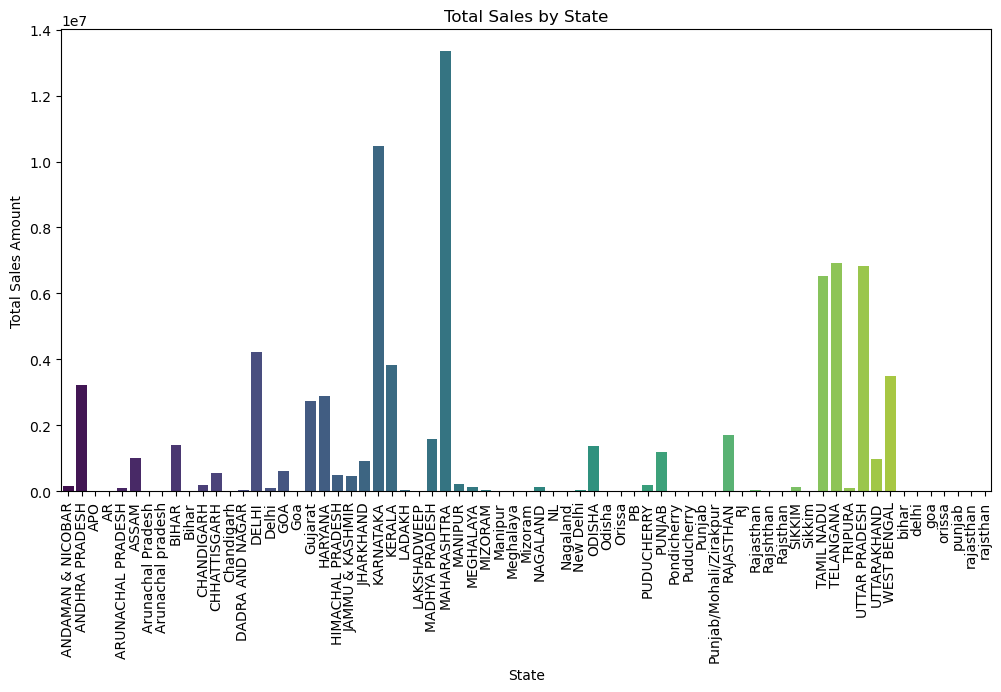

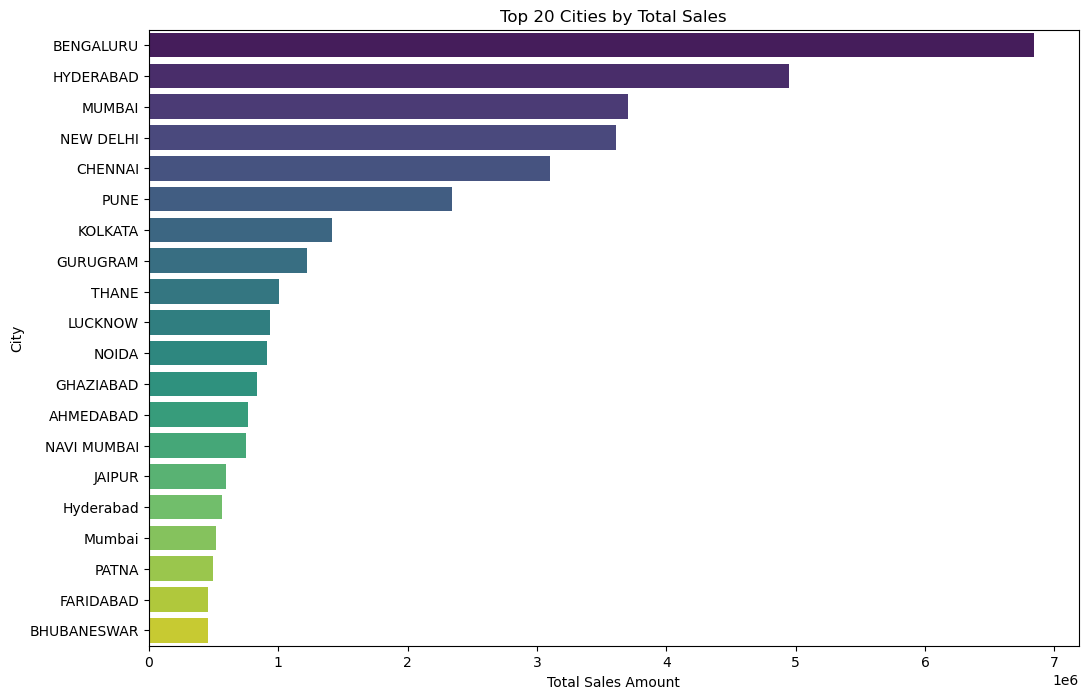

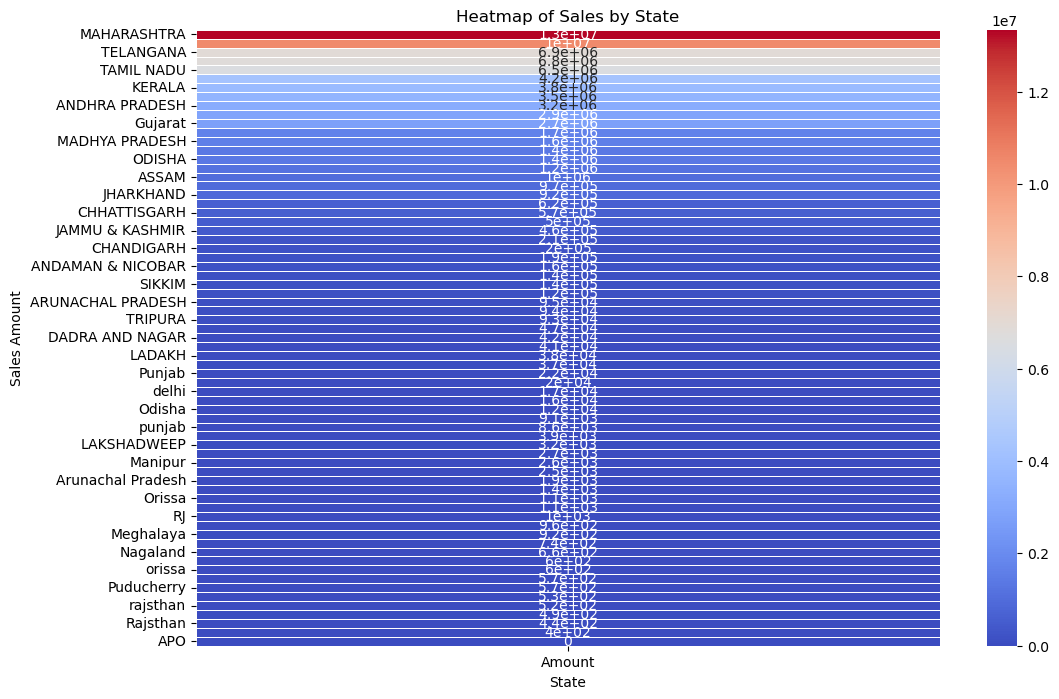

          ship-state      Amount   Qty
0  ANDAMAN & NICOBAR   157424.62   225
1     ANDHRA PRADESH  3217859.86  4816
2                APO        0.00     0
3                 AR      493.00     1
4  ARUNACHAL PRADESH    95235.00   130
                                        ship-city  Amount  Qty
0  (Chikmagalur disterict).     (N.R pur thaluku)   389.0    1
1                  (Via Cuncolim)Quepem,South Goa  1163.0    1
2                                      ,HYDERABAD   563.0    1
3              ,raibarely road faizabad (Ayodhya)  1122.0    1
4                                         ..katra   641.0    1


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\bhaga\Downloads\Amazon Sale Report.csv", encoding='latin1')

# Aggregating sales data by state and city
state_sales = df.groupby('ship-state').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()
city_sales = df.groupby('ship-city').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()

# Visualization 1: Bar chart of total sales by state
plt.figure(figsize=(12, 6))
sns.barplot(x='ship-state', y='Amount', data=state_sales, palette='viridis')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.show()

# Visualization 2: Bar chart of total sales by city
plt.figure(figsize=(12, 8))
sns.barplot(x='Amount', y='ship-city', data=city_sales.sort_values(by='Amount', ascending=False).head(20), palette='viridis')
plt.title('Top 20 Cities by Total Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('City')
plt.show()

# Visualization 3: Heatmap of sales by state
plt.figure(figsize=(12, 8))
heatmap_data = state_sales.pivot_table(index='ship-state', values='Amount', aggfunc='sum').sort_values(by='Amount', ascending=False)
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Sales by State')
plt.xlabel('State')
plt.ylabel('Sales Amount')
plt.show()

# Display first few rows of aggregated sales data by state and city
print(state_sales.head())
print(city_sales.head())


## Sales Data Insights

### 1. Total Sales by State
- **Visualization**: Bar chart
- **Description**: This chart displays the total sales amount aggregated by state.
- **Insights**:
  - Identify which states generate the highest and lowest sales.
  - Observe any regional sales patterns or disparities.

### 2. Top 20 Cities by Total Sales
- **Visualization**: Bar chart
- **Description**: This chart shows the top 20 cities with the highest total sales amounts.
- **Insights**:
  - Recognize the cities that contribute most significantly to sales.
  - Evaluate the concentration of sales in major cities versus others.

### 3. Heatmap of Sales by State
- **Visualization**: Heatmap
- **Description**: This heatmap provides a visual representation of sales amounts across states.
- **Insights**:
  - Quickly identify high and low sales regions through color intensity.
  - Spot any patterns or clusters of high sales areas.

### Data Overview
- **Aggregated Sales Data by State**: Displays total sales and quantities grouped by state.
- **Aggregated Sales Data by City**: Lists total sales and quantities grouped by city.

These visualizations and data summaries help in understanding sales performance across different geographic locations and can inform strategic business decisions.


# 6. Business Insights:

## Business Insights and Recommendations

### 1. **Optimize Sales Strategies**

- **Focus on High-Performing States and Cities**:
  - **Insight**: The bar charts reveal which states and cities are driving the most sales.
  - **Recommendation**: Allocate more resources and marketing efforts to these high-performing regions to capitalize on their success. Consider implementing targeted promotions or incentives to further boost sales in these areas.

- **Expand in Emerging Markets**:
  - **Insight**: States and cities with lower sales may represent untapped potential.
  - **Recommendation**: Conduct market research to understand the needs and preferences of customers in these regions. Develop localized strategies to increase market penetration and drive growth.

### 2. **Improve Customer Satisfaction**

- **Tailor Offerings Based on Regional Preferences**:
  - **Insight**: Variations in sales data can indicate different regional preferences and needs.
  - **Recommendation**: Customize product offerings and marketing messages to align with the preferences of customers in each region. This approach can enhance customer satisfaction and increase sales.

- **Enhance Delivery and Fulfillment Services**:
  - **Insight**: Differences in sales volumes across regions might highlight issues with delivery and fulfillment.
  - **Recommendation**: Evaluate and improve delivery times and fulfillment processes in regions with lower sales. Ensuring reliable and efficient service can boost customer satisfaction and loyalty.

### 3. **Enhance Overall Business Performance**

- **Leverage Data-Driven Decisions**:
  - **Insight**: The heatmap and bar charts provide a clear view of sales distribution and performance.
  - **Recommendation**: Use these insights to make data-driven decisions regarding inventory management, staffing, and resource allocation. Regularly update and analyze sales data to adjust strategies and respond to market changes effectively.

- **Monitor and Adjust Sales Strategies**:
  - **Insight**: Continuous monitoring of sales performance is crucial for identifying trends and opportunities.
  - **Recommendation**: Implement a system for ongoing analysis of sales data. Adjust sales strategies based on performance trends and emerging opportunities to maintain and enhance business growth.

By leveraging these insights and recommendations, businesses can optimize their sales strategies, improve customer satisfaction, and enhance overall performance.


## Deliverables

1. **Comprehensive Analysis Report**
   - **Content**: A detailed report summarizing key findings, insights, and recommendations from the data analysis. This report should include:
     - An overview of the dataset and analysis methodology.
     - Summary of key findings and trends identified.
     - Actionable recommendations based on the insights.

2. **Visualizations**
   - **Content**: Various charts and graphs that illustrate different aspects of the data analysis. These visualizations should include:
     - Bar charts showing total sales by state and city.
     - Heatmaps depicting sales distribution by state.
     - Any other relevant visual representations that highlight key data points.

3. **Insights on Product Preferences, Customer Behavior, and Geographical Sales Distribution**
   - **Content**: Detailed insights into:
     - **Product Preferences**: Analysis of which products are most popular in different regions.
     - **Customer Behavior**: Trends in purchasing patterns and preferences.
     - **Geographical Sales Distribution**: Analysis of sales performance across various states and cities.

4. **Recommendations for Improving Sales Strategies, Inventory Management, and Customer Service**
   - **Content**: Specific recommendations to:
     - **Sales Strategies**: Tailored strategies for optimizing sales based on regional performance.
     - **Inventory Management**: Suggestions for managing inventory more effectively to align with demand.
     - **Customer Service**: Improvements to enhance customer satisfaction and service delivery.

## Expected Outcome

The thorough analysis of the Amazon sales report aims to achieve the following outcomes:

- **Valuable Insights**: Gain actionable insights that can inform business decisions and strategies.
- **Optimized Business Operations**: Enhance operational efficiency by identifying areas for improvement and implementing data-driven strategies.
- **Enhanced Customer Experience**: Improve customer satisfaction through targeted strategies and better service delivery.
- **Revenue Growth**: Drive revenue growth by leveraging insights to optimize sales strategies and market presence.

The analysis should provide a clear understanding of key business drivers and offer practical recommendations to address the specific needs and challenges of the business.
